## Data processing


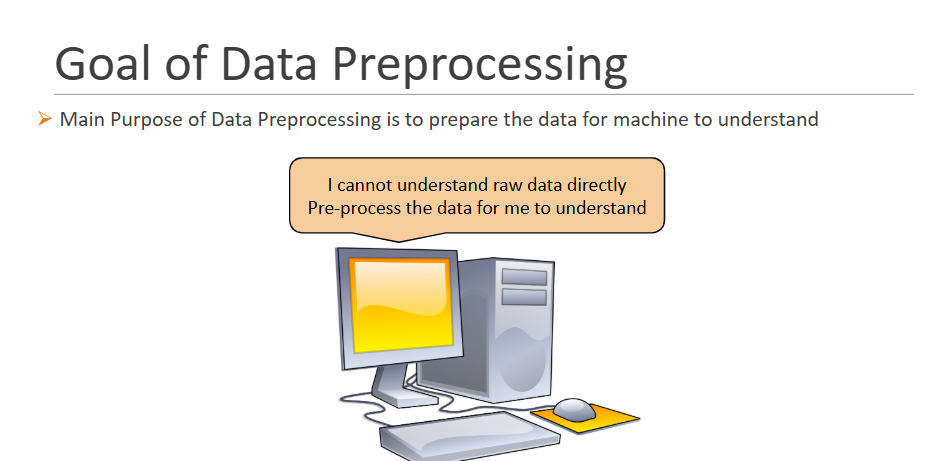

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd 
df = pd.read_csv("https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/50_Startups.csv"
)
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

## separate X & Y features

In [5]:
x= df.drop(columns=["PROFIT"])
y= df[["PROFIT"]]

In [6]:
x.head()

,RND,ADMIN,MKT,STATE
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [7]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## Separate categorical and continous features

In [11]:

cat = list(x.columns[x.dtypes == "object"])
con = list(x.columns[x.dtypes != "object"])

In [12]:
cat

['STATE']

In [13]:
con

['RND', 'ADMIN', 'MKT']

## Build pipeplines to handle data cleaning and Data Preprocessing

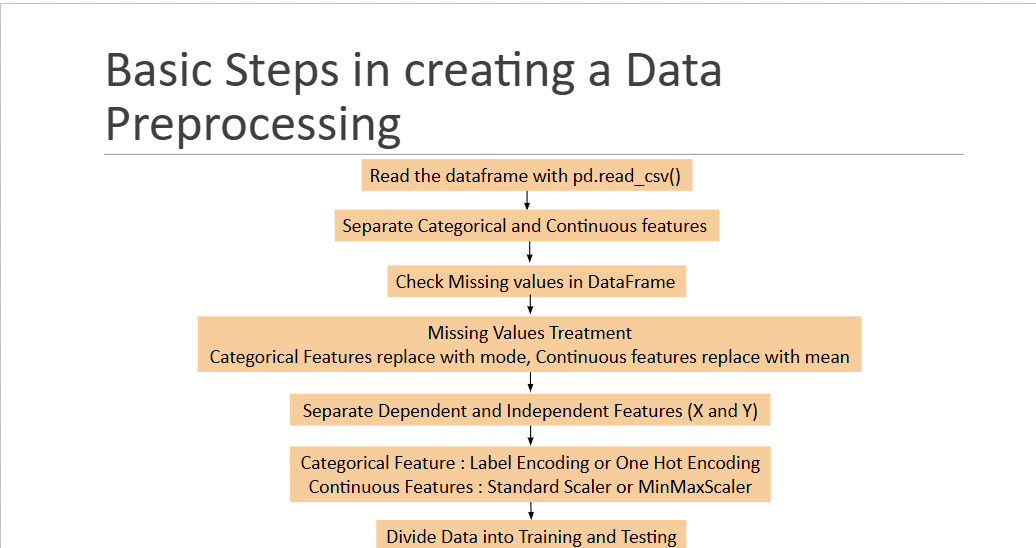

In [14]:
# To create pipelines
from sklearn.pipeline import make_pipeline

# To preprocess categorical and continous data 
from sklearn.preprocessing import OneHotEncoder,StandardScaler

# to perform data cleaning
from sklearn.impute import SimpleImputer

# to combine categorical and continous pipelines
from sklearn.compose import ColumnTransformer

In [15]:
num_pipe = make_pipeline(SimpleImputer(strategy="mean"),StandardScaler())

In [16]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False),
)


In [17]:
pre = ColumnTransformer([("num",num_pipe,con),("cat",cat_pipe,cat)]).set_output(transform="pandas")

In [18]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['RND', 'ADMIN', 'MKT']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['STATE'])])

In [19]:
x_pre =pre.fit_transform(x)
x_pre.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,2.016411,0.560753,2.153943,0.0,0.0,1.0
1,1.955860,1.082807,1.923600,1.0,0.0,0.0
2,1.754364,-0.728257,1.626528,0.0,1.0,0.0
3,1.554784,-0.096365,1.422210,0.0,0.0,1.0
4,1.504937,-1.079919,1.281528,0.0,1.0,0.0


## Model Building

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression(

)
model.fit(x_pre,y)

LinearRegression()

In [23]:
model.score(x_pre,y)

0.9507524843355148

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [25]:
ypreds = model.predict(x_pre)

In [26]:
ypreds[:5]

array([[192390.57136321],
       [189071.32010493],
       [182276.18673285],
       [173584.97618975],
       [172277.13381668]])

In [27]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [29]:
MSE = mean_squared_error(y, ypreds)
MAE = mean_absolute_error(y, ypreds)
RMSE = MSE ** (1 / 2)
r2 = r2_score(y, ypreds)

In [30]:

print(f"MSE: {MSE}")
print(f"MAE: {MAE}")
print(f"RMSE: {RMSE}")
print(f"R2 score: {r2}")

MSE: 78406792.88803765
MAE: 6475.500708609337
RMSE: 8854.761029414496
R2 score: 0.9507524843355148


## Above model can be considered for final predictions